### 1. Prerequisities

Using DriverlessAI Autoviz python client doesn't require any additional packages, other than [DriverlessAI client](http://docs.h2o.ai/driverless-ai/latest-stable/docs/userguide/python_client.html).
However, if you are using Jupyter notebooks or labs, installing [Vega](https://pypi.org/project/vega/) package can help better user experience, as it allows you to render the produced graphs directly inside Jupyter environment. In addition, it provides options to download the generated files in SVG, PNG or JSON formats.


### 2. Initialization

To initialize the Autoviz Python client, follow the same steps as when initializing the client for new experiment.
You need to import the `Client` and initialize it, providing the DriverlessAI host address and login credentials.

In [1]:
from h2oai_client import Client
address = 'http://ip_where_driverless_is_running:12345'
username = 'username'
password = 'password'
cli = Client(address=address, username=username, password=password)

### 3. Upload the dataset

In [18]:
dataset_local_path = '/data/Kaggle/CreditCard/CreditCard-train.csv'
dataset = cli.create_dataset_sync(dataset_local_path)

### 4. Request specific visualizations

In [19]:
hist = cli.autoviz.get_histogram(dataset.key, variable_name='PAY_0')

In [29]:
barchart = cli.autoviz.get_scatterplot(dataset.key, x_variable_name='BILL_AMT3', y_variable_name='BILL_AMT4')

### 5. Visualize using Vega (Optional)

All of the methods provided in `Client.autoviz` return graphics in [Vega Lite (v3)](https://vega.github.io/vega-lite/) format. In order to visualize them, you can either paste the returned graph (`hist`) into [Online editor](https://vega.github.io/editor/#/custom/vega-lite), or you can utilize the Python [Vega package](https://pypi.org/project/vega/), which can visualize the charts directly in Jupyter environment.

In [32]:
from vega import VegaLite

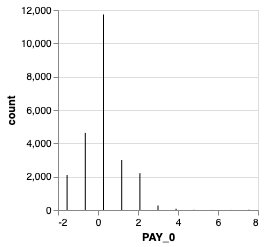

In [33]:
VegaLite(hist)

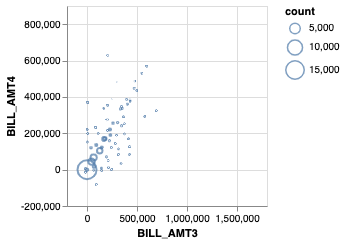

In [34]:
VegaLite(barchart)

---
### 6. API Methods

```
get_histogram(
    dataset_key: str,
    variable_name: str,
    number_of_bars: int = 0,
    transformation: str = "none",
    mark: str = "bar",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    variable_name -- str, name of variable

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    number_of_bars -- int, number of bars
    transformation -- str, default value is "none"
        (otherwise, "log" or "square_root")
    mark -- str, default value is "bar" (use "area" to get a density polygon)
    """

get_scatterplot(
    dataset_key: str,
    x_variable_name: str,
    y_variable_name: str,
    mark: str = "point",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    x_variable_name -- str, name of x variable
        (y variable assumed to be counts if no y variable specified)
    y_variable_name -- str, name of y variable

    ---------------------------
    Optional Keyword arguments:
    ---------------------------

get_bar_chart(
    dataset_key: str,
    x_variable_name: str,
    y_variable_name: str = "",
    transpose: bool = False,
    mark: str = "bar",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    x_variable_name -- str, name of x variable
        (y variable assumed to be counts if no y variable specified)

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    y_variable_name -- str, name of y variable
    transpose -- Boolean, default value is false
    mark -- str, default value is "bar" (use "point" to get a Cleveland dot plot)
    """

get_parallel_coordinates_plot(
    dataset_key: str,
    variable_names: list = [],
    permute: bool = False,
    transpose: bool = False,
    cluster: bool = False,
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    variable_names -- str, name of variables
        (if no variables specified, all in dataset will be used)
    permute -- Boolean, default value is false
        (if true, use SVD to permute variables)
    transpose -- Boolean, default value is false
    cluster -- Boolean, k-means cluster variables and color plot by cluster IDs,
        default value is false
    """

get_heatmap(
    dataset_key: str,
    variable_names: list = [],
    permute: bool = False,
    transpose: bool = False,
    matrix_type: str = "rectangular",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    variable_names -- str, name of variables
        (if no variables specified, all in dataset will be used)
    permute -- Boolean, default value is false
        (if true, use SVD to permute rows and columns)
    transpose -- Boolean, default value is false
    matrix_type -- str, default value is "rectangular" (alternative is "symmetric")
    """

get_boxplot(
    dataset_key: str,
    variable_name: str,
    group_variable_name: str = "",
    transpose: bool = False,
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    variable_name -- str, name of variable for box

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    group_variable_name -- str, name of grouping variable
    transpose -- Boolean, default value is false
    """

get_linear_regression(
    dataset_key: str,
    x_variable_name: str,
    y_variable_name: str,
    mark: str = "point",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    x_variable_name -- str, name of x variable
        (y variable assumed to be counts if no y variable specified)
    y_variable_name -- str, name of y variable

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    mark -- str, default value is "point" (alternative is "square")
    """

get_loess_regression(
    dataset_key: str,
    x_variable_name: str,
    y_variable_name: str,
    mark: str = "point",
    bandwidth: float = 0.5,
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    x_variable_name -- str, name of x variable
        (y variable assumed to be counts if no y variable specified)
    y_variable_name -- str, name of y variable

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    mark -- str, default value is "point" (alternative is "square")
    bandwidth -- float, number in the (0,1)
        interval denoting proportion of cases in smoothing window (default is 0.5)
    """

get_dotplot(
    dataset_key: str,
    variable_name: str,
    mark: str = "point",
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    variable_name -- str, name of variable on which dots are calculated

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    mark -- str, default value is "point" (alternative is "square" or "bar")
    """

get_distribution_plot(
    dataset_key: str,
    x_variable_name: str,
    y_variable_name: str = "",
    subtype: str = "probability_plot",
    distribution: str = "normal",
    mark: str = "point",
    transpose: bool = False,
) -> dict:
    """
    ---------------------------
    Required Keyword arguments:
    ---------------------------
    dataset_key -- str, Key of visualized dataset in DriverlessAI
    x_variable_name -- str, name of x variable

    ---------------------------
    Optional Keyword arguments:
    ---------------------------
    y_variable_name -- str, name of y variable for quantile plot
    subtype -- str "probability_plot" or "quantile_plot"
        (default is "probability_plot" done on x variable)
    distribution -- str, type of distribution, "normal" or "uniform"
        ("normal" is default)
    mark -- str, default value is "point" (alternative is "square")
    transpose -- Boolean, default value is false
    """
```